<a href="https://colab.research.google.com/github/Yunho-seo/education_center5/blob/main/24_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# colab에서 matplotlib 한글화할 때 
!apt-get update -qq
!apt-get install fonts-nanum* -qq
import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
fe = fm.FontEntry(
    fname = r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size':18, 'font.family':'NanumGothic'})

Selecting previously unselected package fonts-nanum-extra.
(Reading database ... 122531 files and directories currently installed.)
Preparing to unpack .../fonts-nanum-extra_20180306-3_all.deb ...
Unpacking fonts-nanum-extra (20180306-3) ...
Selecting previously unselected package fonts-nanum.
Preparing to unpack .../fonts-nanum_20180306-3_all.deb ...
Unpacking fonts-nanum (20180306-3) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-2_all.deb ...
Unpacking fonts-nanum-coding (2.5-2) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Setting up fonts-nanum-extra (20180306-3) ...
Setting up fonts-nanum (20180306-3) ...
Setting up fonts-nanum-coding (2.5-2) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...


In [2]:
# XGBoost
# Gradient Tree Boosting 기법에서 과적합 방지 기능이 추가된 boosting 모델
# 머신러닝 라이브러리
import xgboost as xgb
# 전용 매트릭스 : DMatrix(XGBoost에서 사용하는 최적화된 데이터 형식)
dtrain = xgb.DMatrix('/content/drive/MyDrive/agaricus.txt.train.txt')
dtest = xgb.DMatrix('/content/drive/MyDrive/agaricus.txt.test.txt')

# regularization : 규제
# 학습률 : eta
# logistic 회귀 분류모델 : objective
param = {'max_depth':2, 'eta':1, 'silent':1, 'objective':'binary:logistic'}  # 이진 로지스틱 회귀 / silent : 출력 제어
num_round = 2  # 2회 반복
# 모델을 리턴
bst = xgb.train(param, dtrain, num_round)  # XGBoost 모델 학습 / param은 매개변수, dtrain은 학습 데이터, num_round는 반복 횟수, bst는 학습된 모델 객체

preds = bst.predict(dtest)  # 학습된 모델을 사용하여 테스트 데이터 예측 수행 / predict() : 예측 확률 반환하는 함수
print(preds[:5])

[05:42:10] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.

[0.28583017 0.9239239  0.28583017 0.28583017 0.05169873]


In [3]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
title = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO',
         'B', 'LSTAT', 'medv']
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
print(type(data))
boston_df = pd.DataFrame(data, columns=title)
boston_df.head()

<class 'numpy.ndarray'>


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,RAD,TAX,PTRATIO,B,LSTAT,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
X = boston_df.iloc[:, :12]
print(X.shape)  # 506, 12
y = boston_df.iloc[:, 12]
y.shape

(506, 12)


(506,)

In [34]:
# 데이터를 DMatrix 형식으로 변환
# sklearn의 train_test_split 함수로, 데이터를 학습 세트와 테스트 세트로 분할
from sklearn.metrics import mean_squared_error  # 평가
from sklearn.model_selection import train_test_split

data_dmatrix = xgb.DMatrix(data = X, label = y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  # test_size는 테스트 세트의 비율
                                                    random_state = 123)     # 랜덤 시드

In [35]:
# 회귀 모델 생성
# Boost : bias를 줄임 (차를 줄임)
# regressor 모델 구성
# 전체 열 중 30%만 사용
# 학습율 : 경사하강법 - 미분을 구하여 기울기 방향에 따라 더해주거나(기울기가 -) 뺀다(기울기가 +)
# 최적점을 찾아가는 과정 : 기울기를 그대로 적용한다면, 진폭이 커진다.
# gamma(L0), alpha(L1), lambda(L2)
xg_reg = xgb.XGBRegressor(booster = 'gbtree', objective = 'reg:squarederror',
        colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10,  #  특성의 비율, 학습률, 트리 깊이, L1 정규화 항의 가중치
        n_estimators = 10)    # 생성할 트리의 개수
xg_reg.fit(X_train, y_train)  # 회귀 모델 학습
preds = xg_reg.predict(X_test) # 테스트 데이터에 대한 예측 수행
rmse = np.sqrt(mean_squared_error(y_test, preds))  # 예측 결과와 실제 값 간 평균 제곱근 오차(rmse)를 계산
print("RMSE : %f" % (rmse))
# rmse 값이 낮을 수록 좋은(정확한) 모델 

RMSE : 6.695745


In [8]:
!apt-get -qq install -y graphviz && pip install -q pydot
!apt-get install graphviz libgraphviz-dev pkg-config
!pip install pygraphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu4).
graphviz is already the newest version (2.42.2-3build2).
libgraphviz-dev is already the newest version (2.42.2-3build2).
0 upgraded, 0 newly installed, 0 to remove and 27 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


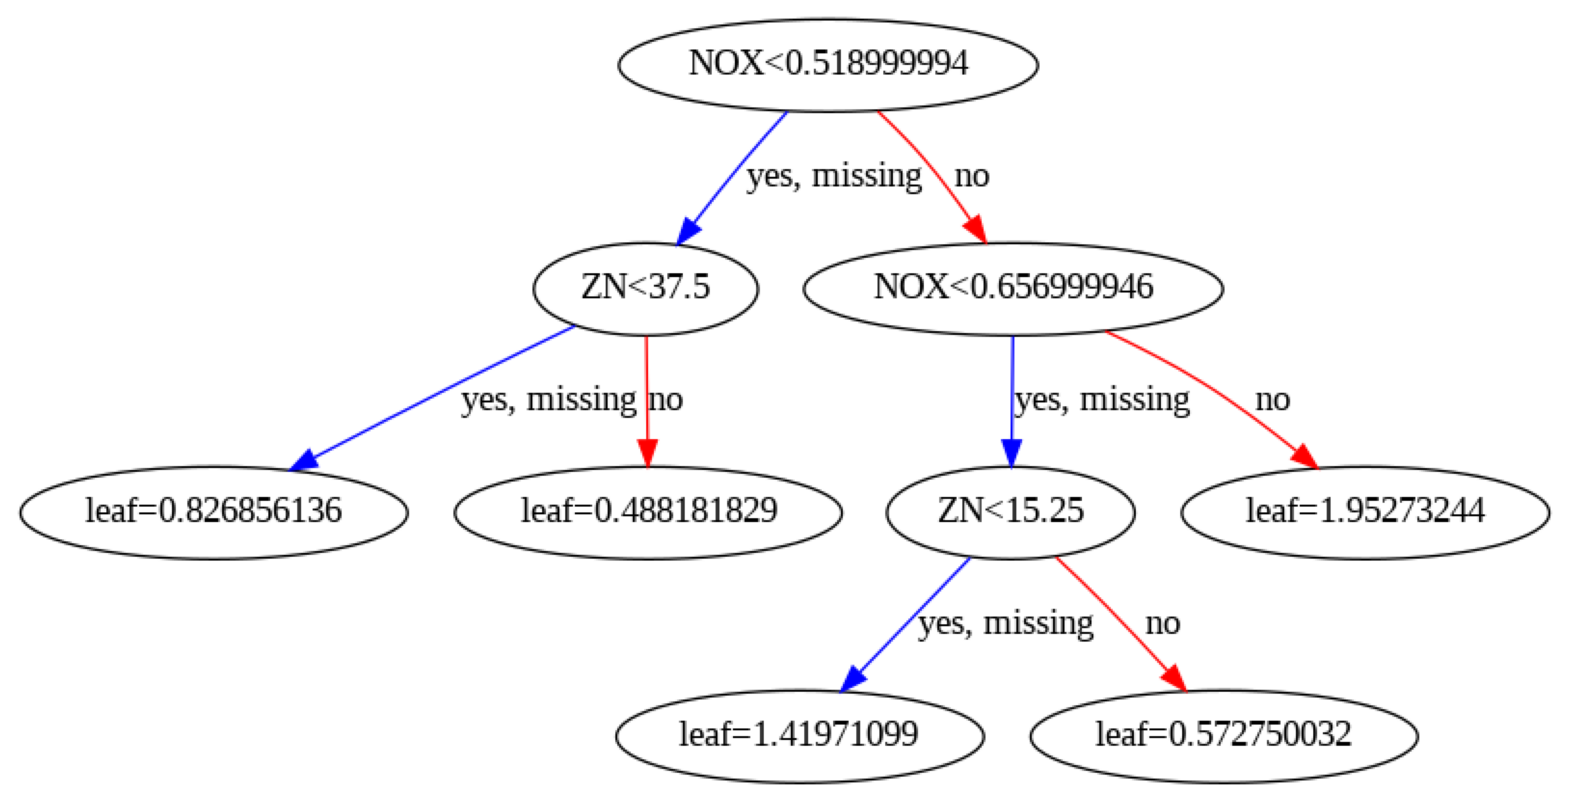

In [36]:
#  XGBoost 모델의 첫 번째 트리를 시각화
import matplotlib.pyplot as plt
xgb.plot_tree(xg_reg, num_trees = 0)  # num_trees = 0 은 첫번째 트리
plt.rcParams['figure.figsize'] = [50, 30]
plt.show()

In [37]:
# XGBoost를 사용한 교차검증
data_dmatrix = xgb.DMatrix(data = X, label = y)  # XGBoost의 DMatrix 형식으로 데이터 변환
params = {'objective':'reg:squarederror', 'colsample_bytree':0.3, 'learning_rate' : 0.1,
          'max_depth':5, 'alpha':10}
# 50회 boosting(부스팅, 계산의 의미 / 오차를 개선)
# 끝까지 개선되는 중
# cv : parameter test하는 명령어
cv_results = xgb.cv(dtrain = data_dmatrix, params = params, nfold = 3,  # 학습 데이터, 매개변수, 교차 검증 횟수
                    num_boost_round = 50, early_stopping_rounds = 10, metrics = 'rmse',  # 부스팅 반복횟수(50회), 조기종료를 위한 반복횟수(10회), 평가의 척도(평균 제곱근 오차)
                    as_pandas = True, seed = 123)  # as_pandas는 결과를 pandas DataFrame 형식으로 반환할지 여부, seed는 랜덤 시드
print(cv_results.head(10))  # cv_results는 교차 검증 결과 DataFrame

   train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0        12.904751        0.164821       12.909078       0.359967
1        11.867623        0.161626       11.886063       0.346535
2        10.949283        0.155907       10.994007       0.374295
3        10.094818        0.108508       10.156009       0.394050
4         9.361823        0.090639        9.431939       0.380924
5         8.703313        0.095455        8.794340       0.360146
6         8.084364        0.101289        8.219961       0.327050
7         7.493657        0.102162        7.700883       0.298892
8         6.957432        0.090193        7.200806       0.322148
9         6.552656        0.081363        6.845569       0.311321


In [38]:
print((cv_results['test-rmse-mean']).tail(1))
print((cv_results).tail(1))

49    4.085073
Name: test-rmse-mean, dtype: float64
    train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
49         2.474564        0.065941        4.085073       0.073289


In [39]:
# 매개변수와 학습 데이터를 사용하여 XGBoost 모델 학습
# num_boost_round 매개변수는 부스팅 반복 횟수, 즉 트리의 개수 (10개)
# params 테스트
xg_reg = xgb.train(params = params, dtrain = data_dmatrix, num_boost_round = 10)

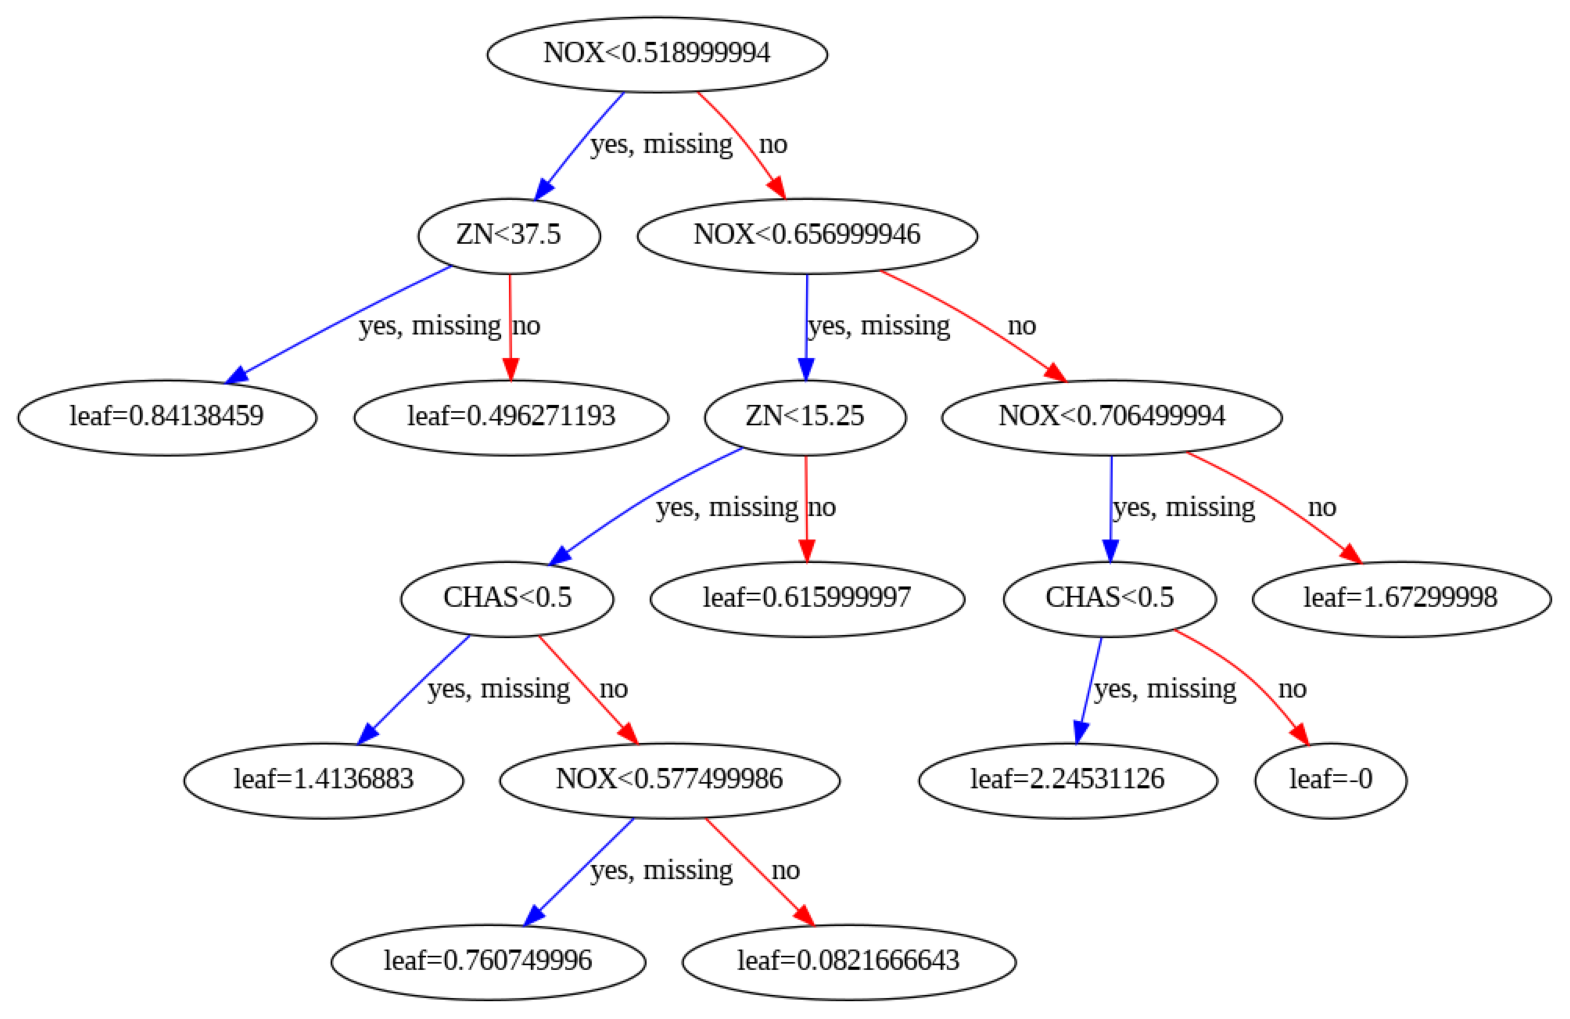

In [41]:
import matplotlib.pyplot as plt
import xgboost as xgb
xgb.plot_tree(xg_reg, num_trees = 0)  # num_trees = 0 은 첫번째 트리
plt.rcParams['figure.figsize'] = [20, 20]
plt.show()

In [42]:
from xgboost.sklearn import XGBRegressor
import scipy.stats as st
# CPU 코어 병렬처리
xgbreg = XGBRegressor(objective = 'reg:squarederror', n_jobs = -1)

In [43]:
# 하이퍼 파라미터 튜닝(tuning)
params = {  # randint나 uniform으로 범위 설정
    'n_estimators' : st.randint(3, 40),
    'max_depth' : st.randint(3, 40),
    'learning_rate' : st.uniform(0.05, 0.4),  # 균등
    'gamma' : st.uniform(0, 10),
}
# GridSearchCV
from sklearn.model_selection import RandomizedSearchCV  # 전체 조합 사용하지 않는다.
gs = RandomizedSearchCV(xgbreg, params, n_jobs = 1)  # n_jobs : 병렬 처리에 사용할 CPU 코어 수
gs.fit(X_train, y_train)
gs.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=5.524804086648333, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.25198514246351594, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=12, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=17, n_jobs=-1, num_parallel_tree=None, predictor=None,
             random_state=None, ...)

In [30]:
gs.best_params_

{'gamma': 7.52284609084451,
 'learning_rate': 0.20821775297151096,
 'max_depth': 23,
 'n_estimators': 37}

In [45]:
# pima 데이터
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
dataset = pd.read_csv('/content/drive/MyDrive/pima.csv')
print(dataset.shape)  # 332x9
dataset.head()

(332, 9)


,Unnamed: 0,npreg,glu,bp,skin,bmi,ped,age,type
0,1,6,148,72,35,33.6,0.627,50,Yes
1,2,1,85,66,29,26.6,0.351,31,No
2,3,1,89,66,23,28.1,0.167,21,No
3,4,3,78,50,32,31.0,0.248,26,Yes
4,5,2,197,70,45,30.5,0.158,53,Yes


In [46]:
# Unnamed: 0, type 열 없애기
X = dataset.iloc[:, 1:dataset.shape[1]-1]
print(X.shape)
print(X.head())
y = dataset.iloc[:, dataset.shape[1]-1]
y = np.where(y == 'Yes', 1, 0)
y = pd.Series(y)

(332, 7)
   npreg  glu  bp  skin   bmi    ped  age
0      6  148  72    35  33.6  0.627   50
1      1   85  66    29  26.6  0.351   31
2      1   89  66    23  28.1  0.167   21
3      3   78  50    32  31.0  0.248   26
4      2  197  70    45  30.5  0.158   53


In [48]:
# 데이터 모델 생성
from sklearn.model_selection import train_test_split
seed = 7
test_size = 0.33  # 데이터의 33%가 테스트 셋으로 사용된다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size,
                                                    random_state = seed)
# n_jobs = -1 : 가능한 모든 코어를 사용하라는 의미
# 분류 문제이기에, model이라는 XGBoost 분류기 모델 생성
model = XGBClassifier(n_jobs = -1, learning_rate = 0.1, max_depth = 2, random_state = 200)
model.fit(X_train, y_train)
print(model)  # 모델 출력

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=200, ...)


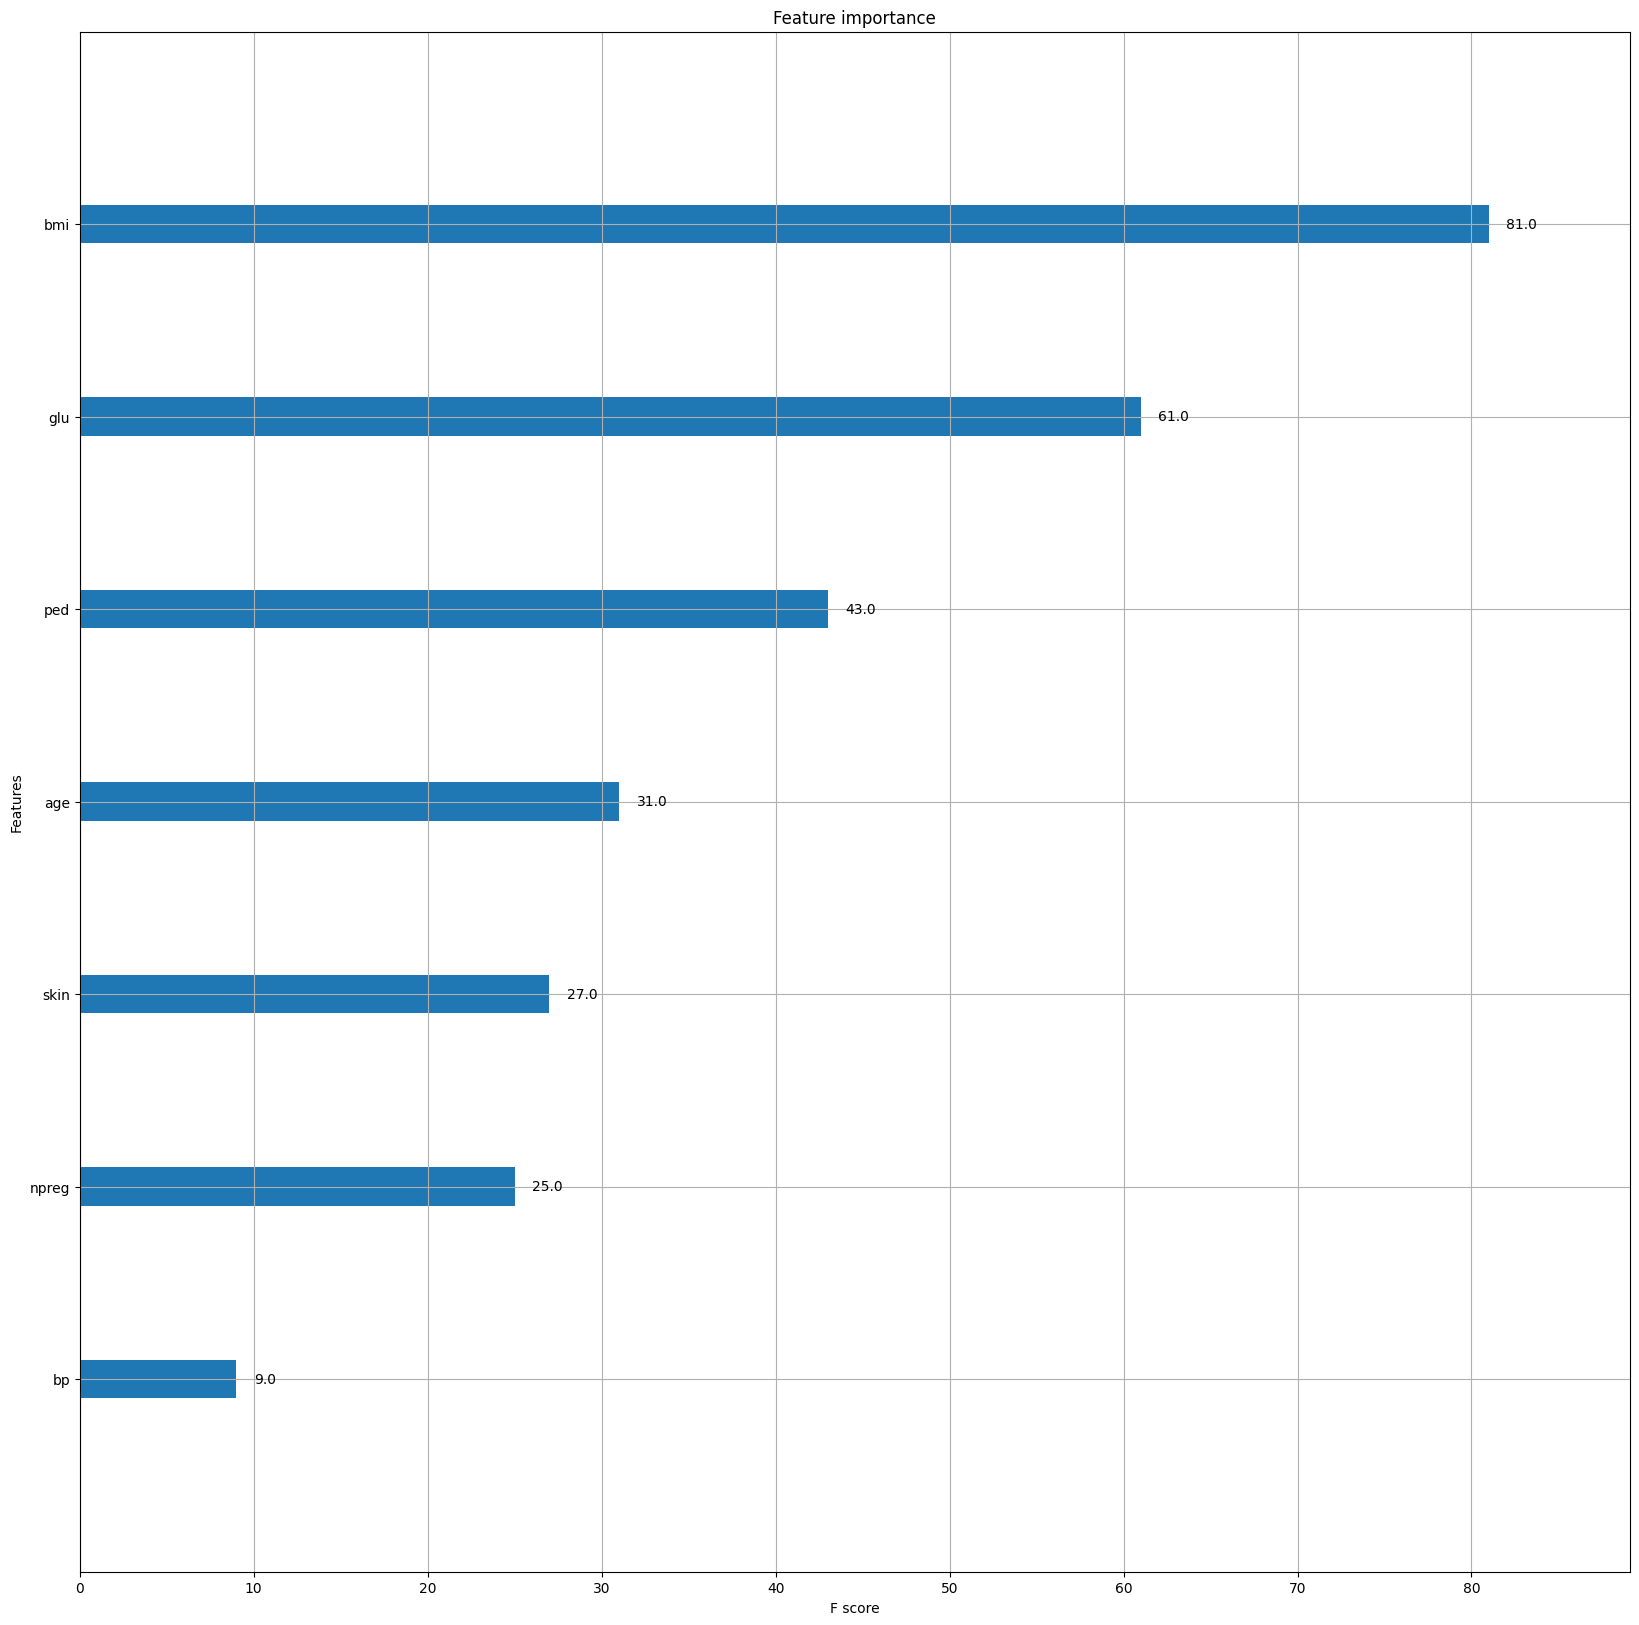

In [49]:
# 변수 중요도를 출력(시각화)
from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(model)
pyplot.show()

In [54]:
# 문제
# accuracy_score를 이용하여 훈련 정확도를 출력 (%)
# 훈련 데이터에 대한 정확도, 테스트 데이터에 대한 정확도를 출력
from sklearn.metrics import accuracy_score

y_pred_train = model.predict(X_train)
print(y_pred_train)
accuracy = accuracy_score(y_train, y_pred_train)
print("훈련 데이터 정확도 : %.2f%%" % (accuracy * 100.0))  # 91.44 %

y_pred = model.predict(X_test)
print(y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("테스트 데이터 정확도 : %.2f%%" % (accuracy * 100.0))  # 75.45 %  - 훈련 데이터에 과적합됨

[0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0
 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0
 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0
 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1
 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0]
훈련 데이터 정확도 : 91.44%
[0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0]
테스트 데이터 정확도 : 75.45%


In [55]:
# 과적합의 원인을 노이즈(noise)를 가진 변수라고 보고, feature_selection 진행

# XGBoost 모델의 특성 중요도와 중요도의 임계값(thresholds) 확인
from sklearn.feature_selection import SelectFromModel
print(model.feature_importances_)
thresholds = np.sort(model.feature_importances_)  # 특성 중요도 값 정렬하여 thresholds 배열에 저장, 임계값을 확인
print(thresholds)
print(np.sum(thresholds))  # 정렬된 특성 중요도 값의 합 (모든 특성 중요도의 총합 확인 가능)

[0.1278943  0.34957853 0.01207848 0.089619   0.12744637 0.10819691
 0.1851864 ]
[0.01207848 0.089619   0.10819691 0.12744637 0.1278943  0.1851864
 0.34957853]
1.0


In [56]:
# 특성 중요도에 기반하여 특성 선택, 선택한 특성 사용하여 모델 재학습, 정확도 평가
for thresh in thresholds:  # 변수제거법 : threshold(임계값)의 경계선을 중심
  # prefit = True : 처음부터 학습할 모델 대신, 이미 학습되어 있는 모델에 추가 학습
  # scikits : transformation(데이터 변형), model(predict, 예측)
  selection = SelectFromModel(model, threshold = thresh, prefit = True)  # 이미 학습된 모델 사용, 임계값 기준으로 특성 선택 
  select_X_train = selection.transform(X_train)  # 선택된 특성 사용하여 훈련데이터 변환 (selection.transform())
  print(type(select_X_train))  # 훈련 데이터의 형태 출력
  selection_model = XGBClassifier(use_label_encoder = False)  # 선택된 특성을 사용하여 새 XGBoost 분류기 모델 생성
  selection_model.fit(select_X_train, y_train)  # 모델 학습
  select_X_test = selection.transform(X_test)
  y_pred = selection_model.predict(select_X_test)  # 선택된 특성을 사용하여 테스트 데이터에 대한 예측값 계산
  predictions = [round(value) for value in y_pred] # 0.5를 기준으로 1.0 / 예측값들을 반올림
  accuracy = accuracy_score(y_test, predictions)   # 정확도 (반올림한 예측값과 테스트 데이터의 예측값)
  print("Thresh = %.3f, n=%d, Accuracy: %.2f%%" % (thresh,
              select_X_train.shape[1], accuracy * 100.0))
# 임계값이 변할 때마다 선택한 특성 개수와 정확도가 바뀐다.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


<class 'numpy.ndarray'>


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Thresh = 0.012, n=7, Accuracy: 74.55%
<class 'numpy.ndarray'>


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Thresh = 0.090, n=6, Accuracy: 74.55%
<class 'numpy.ndarray'>


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Thresh = 0.108, n=5, Accuracy: 79.09%
<class 'numpy.ndarray'>


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Thresh = 0.127, n=4, Accuracy: 74.55%
<class 'numpy.ndarray'>
Thresh = 0.128, n=3, Accuracy: 78.18%
<class 'numpy.ndarray'>
Thresh = 0.185, n=2, Accuracy: 72.73%
<class 'numpy.ndarray'>
Thresh = 0.350, n=1, Accuracy: 75.45%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encod

In [57]:
# Thresh = 0.108에 부합하는 모델 만들기
thresh = 0.108
selection = SelectFromModel(model, threshold=thresh, prefit=True)
select_X_train = selection.transform(X_train)
select_X_test = selection.transform(X_test)

selection_model = XGBClassifier(use_label_encoder = False)
selection_model.fit(select_X_train, y_train)  # 모델 학습
y_pred = selection_model.predict(select_X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))  # 정확도 : 79.09 %

Accuracy: 79.09%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [58]:
# 문제
# 변수 선택법에서 변수가 제거된 이후의 데이터에 대하여
# n_estimators, max_depth, learning_rate, gamma에 대해 
# hyper parameter tuning을 실시하고 best_params_를 출력

params = {
    'n_estimators' : st.randint(3, 40),
    'max_depth' : st.randint(3, 40),
    'learning_rate' : st.uniform(0.05, 0.4),
    'gamma' : st.uniform(0, 10),
}
gs = RandomizedSearchCV(selection_model, params, n_jobs = 1, verbose = 0)
gs.fit(select_X_train, y_train)
gs.best_params_

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

{'gamma': 3.716358264548798,
 'learning_rate': 0.3596079211247674,
 'max_depth': 35,
 'n_estimators': 11}

In [59]:
y_pred_train = gs.best_estimator_.predict(select_X_train)
accuracy = accuracy_score(y_train, y_pred_train)
print("훈련 정확도: %.2f%%" % (accuracy * 100.0))  # 89.19%

훈련 정확도: 89.19%


In [62]:
# model service를 진행
# 독립변수만 변화
# 모델이 2개 (전체 변수를 다 학습한 모델, 변수를 선택한 모델)
import pickle
pickle.dump(selection_model, open("pima.pickle.dat", "wb"))
loaded_model = pickle.load(open("pima.pickle.dat", "rb"))

import joblib
joblib.dump(selection_model, "pima.joblib.dat")
loaded_model = joblib.load("pima.joblib.dat")

y_pred = loaded_model.predict(select_X_test)
predictions = [round(value) for value in y_pred]  # 추가학습이 가능

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))  # Accuracy: 79.09%

Accuracy: 79.09%


In [ ]:
# 기존 모델에 추가학습이 가능하다 (새로운 데이터 발생)
# fit할 때, xgb_model 옵션에 = loaded_model
# scikits learn에서는, partial_fit를 있었다. (부분적으로 학습)

In [64]:
append_model = XGBClassifier(use_label_encoder = False)
append_model.fit(select_X_train, y_train, xgb_model = loaded_model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [65]:
y_pred = loaded_model.predict(select_X_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))  # Accuracy: 79.09%

# 변화된 내용(Accuracy)은 없다 (어짜피 똑같은 데이터이기 때문이다.)

Accuracy: 79.09%


In [ ]:
# people 데이터

In [7]:
# DataFrame
train_set = pd.read_csv('/content/drive/MyDrive/people.data', header = None)
test_set = pd.read_csv('/content/drive/MyDrive/people.test', skiprows = 1, header = None)

train_set.head()
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       32561 non-null  int64 
 1   1       32561 non-null  object
 2   2       32561 non-null  int64 
 3   3       32561 non-null  object
 4   4       32561 non-null  int64 
 5   5       32561 non-null  object
 6   6       32561 non-null  object
 7   7       32561 non-null  object
 8   8       32561 non-null  object
 9   9       32561 non-null  object
 10  10      32561 non-null  int64 
 11  11      32561 non-null  int64 
 12  12      32561 non-null  int64 
 13  13      32561 non-null  object
 14  14      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
# 열 이름 바꾸기
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
              'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels
train_set.info()
train_set.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  wage_class      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
# 데이터에 강건한 모델 : 트리(Tree) 모델
# feature 변수의 특징
print(train_set.shape)
np.sum(train_set.isna())  # 결측치(na)의 개수
np.sum(train_set.replace(' ?', np.nan).isna())  # ?로 표시된 값을 결측치로 대체 이후 결측치 개수 출력

(32561, 15)


age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
wage_class           0
dtype: int64

In [11]:
# 결측치 제거 
train_nomissing = train_set.replace(' ?', np.nan).dropna()
test_nomissing = test_set.replace(' ?', np.nan).dropna()

In [28]:
test_nomissing['wage_class'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [29]:
test_nomissing['wage_class'] = test_nomissing.wage_class.replace(
    {' <=50K.':' <=50K', ' >50K.':' >50K'})
test_nomissing.wage_class.unique()

array([' <=50K', ' >50K'], dtype=object)

In [14]:
combined_set = pd.concat([train_nomissing, test_nomissing], axis = 0)
combined_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45222 non-null  int64 
 1   workclass       45222 non-null  object
 2   fnlwgt          45222 non-null  int64 
 3   education       45222 non-null  object
 4   education_num   45222 non-null  int64 
 5   marital_status  45222 non-null  object
 6   occupation      45222 non-null  object
 7   relationship    45222 non-null  object
 8   race            45222 non-null  object
 9   sex             45222 non-null  object
 10  capital_gain    45222 non-null  int64 
 11  capital_loss    45222 non-null  int64 
 12  hours_per_week  45222 non-null  int64 
 13  native_country  45222 non-null  object
 14  wage_class      45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [15]:
# 문제
# 데이터 타입이 Object인 열에 대해, 중복되지 않는 카테고리가 몇 개씩인지 확인 (unique())
for feature in test_nomissing.columns:
  if combined_set[feature].dtype == 'object':
    print(combined_set[feature].unique())

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv']
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
[' Male' ' Female']
[' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' Puerto-Rico'
 ' Honduras' ' England' ' Canada' ' Germany' ' Iran' ' Philippines'
 ' Poland' ' Colu

In [16]:
# 문제
# 범주형 데이터 타입인 열을 모두 범주화하기
for feature in test_nomissing.columns:
  if combined_set[feature].dtype == 'object':
     combined_set[feature] = pd.Categorical(combined_set[feature]).codes
print(combined_set.head())

   age  workclass  fnlwgt  education  education_num  marital_status  \
0   39          5   77516          9             13               4   
1   50          4   83311          9             13               2   
2   38          2  215646         11              9               0   
3   53          2  234721          1              7               2   
4   28          2  338409          9             13               2   

   occupation  relationship  race  sex  capital_gain  capital_loss  \
0           0             1     4    1          2174             0   
1           3             0     4    1             0             0   
2           5             1     4    1             0             0   
3           5             0     2    1             0             0   
4           9             5     2    0             0             0   

   hours_per_week  native_country  wage_class  
0              40              38           0  
1              13              38           0  
2       

In [17]:
train_nomissing.shape[0]

30162

In [32]:
# 문제
# train/test로 다시 분리
# 스택과 큐 만들때 사용한 pop()
final_train = combined_set[:train_nomissing.shape[0]]
final_test = combined_set[train_nomissing.shape[0]:]
print(len(final_test))
len(final_train)

15060


30162

In [33]:
# 문제 
# 독립변수, 종속변수(wage_class) 결합
y_train = final_train.pop('wage_class')
y_test = final_test.pop('wage_class')

In [90]:
# GPU를 사용하여 모델을 학습

In [34]:
from xgboost import XGBClassifier
xgb1 = XGBClassifier(tree_method='gpu_hist', gpu_id=0)
xgb1.fit(final_train, y_train)
print(xgb1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


In [40]:
result = xgb1.predict(final_test)
print(result)
score = (result == y_test).mean()
print(score) 

[0 0 0 ... 1 0 1]
0.8672642762284196


In [41]:
from sklearn.model_selection import GridSearchCV
cv_params = {'max_depth':[3, 5, 7], 'min_child_weight':[1, 3, 5],
             'n_estimators':[100, 300, 500, 1000]}
ind_params = {'learning_rate':0.1, 'seed':0, 'subsample':0.8,
              'colsmaple_bytree':0.8, 'objective':'binary:logistic'}
optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params),
                             cv_params, scoring = 'accuracy', cv = 5, n_jobs = -1)
optimized_GBM.fit(final_train, y_train)

[06:31:04] WARNING: ../src/learner.cc:767: 
Parameters: { "colsmaple_bytree" } are not used.



GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     colsmaple_bytree=0.8,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 300, 500, 1000]},
             scoring='accuracy')

In [42]:
estimator_best = optimized_GBM.best_estimator_
estimator_best.save_model("model.json")

# 웹 서버
estimator_best_loaded = XGBClassifier(tree_method='gpu_hist', gpu_id = 0)
estimator_best_loaded.load_model("model.json")
estimator_best_loaded

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, colsmaple_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None,
              feature_types=['int', 'int', 'int', 'int', 'int', 'int', 'int',
                             'int', 'int', 'int', 'int', 'int', 'int', 'int'],
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

In [43]:
from sklearn.metrics import accuracy_score

y_pred = estimator_best_loaded.predict(final_test)
print(len(y_test), len(y_pred))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

15060 15060
Accuracy: 86.97%


In [44]:
# 추가학습
import xgboost
# XGBClassifier로 만든 estimator_best_loaded
booster_best = estimator_best_loaded.get_booster()
updatetrain = xgboost.DMatrix(final_train, y_train)  # 무변화 (데이터가 변경되면 가능하다.)
booster_best.update(updatetrain, 1)